In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Importing the dataset

In [264]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [265]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [266]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have Missing values in Age Cabin and Embarked column.

In [267]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariant,Bivariant,Multivariant Analysis

In [269]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

As survived is our dependent variable the value count of survived and non survived differs we need to do Smote technique.

<AxesSubplot:xlabel='Survived', ylabel='count'>

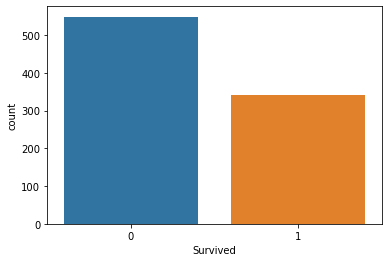

In [270]:
sns.countplot(df['Survived'])

Ploting the 2 categories of survived variable.

<AxesSubplot:xlabel='Survived', ylabel='count'>

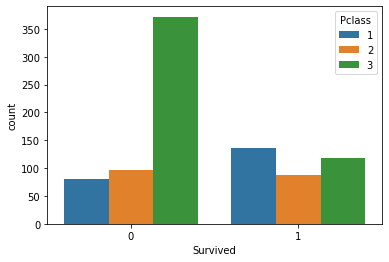

In [271]:
sns.countplot(hue='Pclass',x='Survived',data=df)

from above plot we can observe that the 3rd class passengers could not survive as compared to 1st and 2nd class.

<AxesSubplot:xlabel='Survived', ylabel='count'>

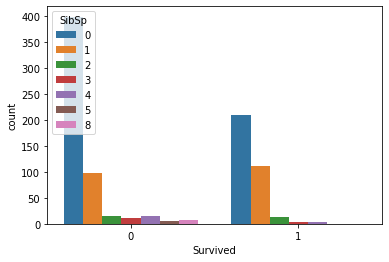

In [272]:
sns.countplot(hue='SibSp',x='Survived',data=df)

People who where not travelling with siblings/spouse could not survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

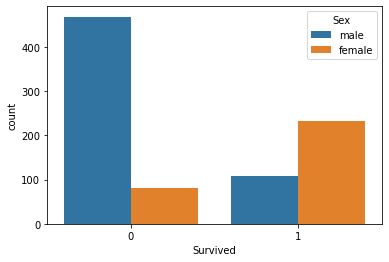

In [273]:
sns.countplot(hue='Sex',x='Survived',data=df)

More Females survived as compared to males.

<AxesSubplot:xlabel='Survived', ylabel='count'>

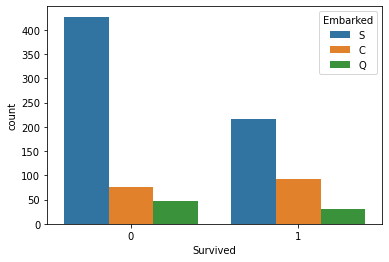

In [274]:
sns.countplot(hue='Embarked',x='Survived',data=df)

passesngers having Embarkaed for Southmpton could not Survived as compared to others. 

<AxesSubplot:xlabel='Age', ylabel='Density'>

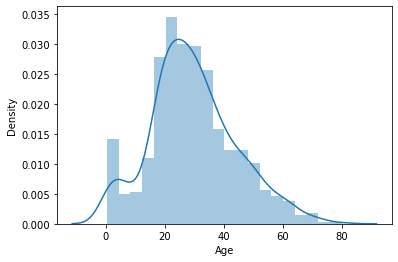

In [275]:
sns.distplot(df['Age'])

We can observe from above distplot the age of passengers on ship were vary from 3-80 years

<AxesSubplot:xlabel='Fare', ylabel='Density'>

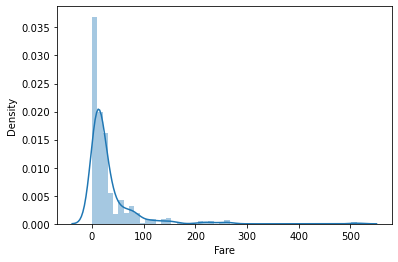

In [276]:
sns.distplot(df['Fare'])

From above distplot we can see the presence of outliers in the fare variable as the plot is highly left skewed.

<AxesSubplot:xlabel='Fare'>

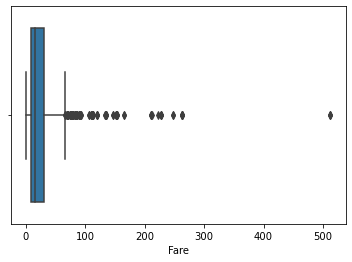

In [277]:
sns.boxplot(df['Fare'])

The boxplot confirms the presence of outliers in the Fare variable.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

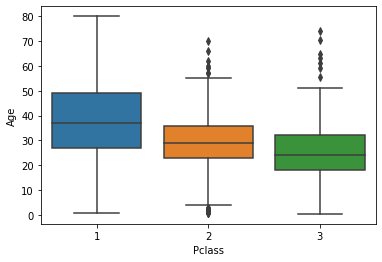

In [278]:
sns.boxplot(x='Pclass',y='Age',data=df)

From the above plot we can observe that the passenger class carries people having maximum age 80 whereas passenger class 2 carries people having maximum gae upto 60 years and passenger class 3 carries young generation people having maximum age 50 and average age lies between 25-30. We have observed in the above plots the passenger class 3 people died the most we can say that young people whoes average age is around 30 died the most.

# DATA CLEANING

### 1. Missing values

In [279]:
df.drop('Cabin',axis=1,inplace=True) 

As cabin carries maximum missing values and gives us no relevant info. we can drop the column.

In [280]:
df["Embarked"].fillna('S',inplace=True)

As the value count of southampton is the most so replacing the missing values with 'S'

In [281]:
df['Age'].fillna(28,inplace=True)

Mean of the Age is 28 so replacing missing values of age with 28

In [282]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## 2. Feature Engineering

In [283]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

As the name and ticket gives us the least information we can drop the columns.

In [284]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## 3.Label Encoding

In [285]:
le=LabelEncoder()

name=["Sex","Embarked"]
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))

In [286]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


 Columns like Age and Embarked needs label encoding as the data is of category type

In [287]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<AxesSubplot:>

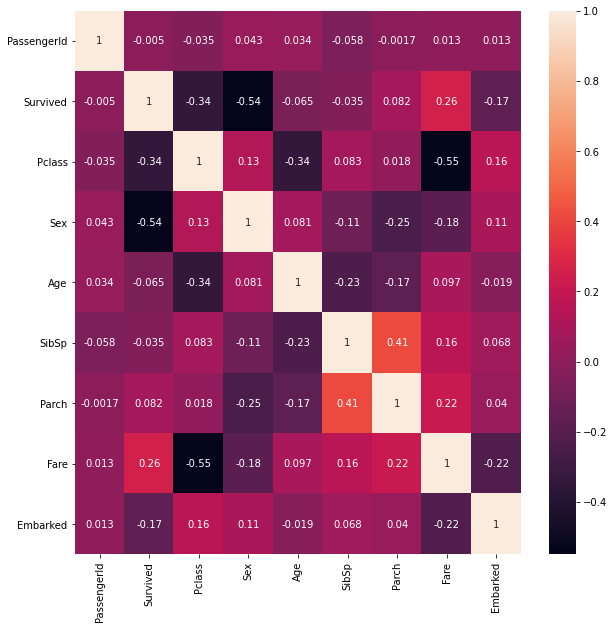

In [288]:
ply.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## 4.Removing Outliers

In [289]:
zp=np.abs(zscore(df))   #removing outliers present the dataset
zp
threshold=3
print(np.where(zp>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [290]:
df_new=df[(zp<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


Outliers are removed rows are reduced from 891 to 820.

In [291]:
df_new.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.401952
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

skewness is present in data we will using yeo-johnson to reduce the skewness.

# Dividing the columns in X and Y

In [292]:
x=df_new.drop("Survived",axis=1)   #input variables
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [323]:
y=df_new['Survived']   #output variables
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

## 5. Performing yeo-johnson to remove skewness

In [294]:
from sklearn.preprocessing import power_transform,MinMaxScaler
x=power_transform(x,method='yeo-johnson')
x


array([[-2.15631324,  0.87283049,  0.72203588, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-2.14032052, -1.47067587, -1.38497273, ..., -0.48469263,
         1.55364494, -1.78767552],
       [-2.12579352,  0.87283049, -1.38497273, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 1.56705476,  0.87283049, -1.38497273, ...,  2.08665417,
         0.39490799,  0.60778719],
       [ 1.57009584, -1.47067587,  0.72203588, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 1.57313595,  0.87283049,  0.72203588, ..., -0.48469263,
        -0.76629016, -1.24967343]])

## 6. Performing MinMaxScaling

In [295]:
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.        , 1.        , 1.        , ..., 0.        , 0.44566706,
        1.        ],
       [0.00428823, 0.        , 0.        , ..., 0.        , 0.85522966,
        0.        ],
       [0.00818344, 1.        , 0.        , ..., 0.        , 0.46133858,
        1.        ],
       ...,
       [0.99836941, 1.        , 0.        , ..., 1.        , 0.65652513,
        1.        ],
       [0.99918484, 0.        , 1.        , ..., 0.        , 0.70101008,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.45739854,
        0.22459213]])

Min MaxScaling is performed as could see the age and fare are scaled differently as compared to other paramenters bringing them on same scale perofrmed minmax scaling.

## 7.SMOTE

In [296]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [297]:
y_res.value_counts()

0    500
1    500
Name: Survived, dtype: int64

In [298]:
y.shape

(820,)

In [299]:
x.shape

(820, 8)

As the output variable is highly imbalanced to balance it we performed Smote.

## Performing Algorithms

In [300]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("Best accuracy is",round(maxacc,2),"at random state",maxrs)

Best accuracy is 0.85 at random state 47


In [301]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=47)

# 1.Logistic Regression

In [302]:
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
ac=accuracy_score(y_test1,pred)
print("accuracy score",ac)
clas=classification_report(y_test1,pred)
print(clas)

accuracy score 0.85
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       148
           1       0.85      0.85      0.85       152

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# 2.Decision Tree Classifier

In [303]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.7466666666666667
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       148
           1       0.75      0.75      0.75       152

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# 3.Support Vector Classifier

In [304]:
ker=["rbf","poly","linear"]
for i in ker:
    svc=SVC(kernel=i)
    svc.fit(x_train1,y_train1)
    pred=svc.predict(x_test1)
    print(i,accuracy_score(y_test1,pred))
    print(i,classification_report(y_test1,pred))

rbf 0.8366666666666667
rbf               precision    recall  f1-score   support

           0       0.82      0.85      0.84       148
           1       0.85      0.82      0.84       152

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

poly 0.82
poly               precision    recall  f1-score   support

           0       0.79      0.86      0.82       148
           1       0.85      0.78      0.82       152

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

linear 0.8066666666666666
linear               precision    recall  f1-score   support

           0       0.75      0.91      0.82       148
           1       0.89      0.70      0.79       152

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.80       300

In [305]:
svc1=SVC(kernel="poly",probability=True)
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.82
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       148
           1       0.85      0.78      0.82       152

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



# 4. Multinomial Classifier

In [306]:
mnb=MultinomialNB()
mnb.fit(x_train1,y_train1)
pred=mnb.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.7866666666666666
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       148
           1       0.82      0.74      0.78       152

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



# 5. Random Forest Classifier

In [307]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
print(accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       148
           1       0.83      0.84      0.84       152

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



# Cross Validation Score

In [308]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm,x,y,cv=5).mean())  #logistic regression

0.7914634146341464


In [309]:
print(cross_val_score(mnb,x,y,cv=5).mean()) #multinomial regression

0.7024390243902439


In [324]:
print(cross_val_score(dtc,x,y,cv=5).mean()) #decision tree classifier

0.7597560975609756


In [311]:
print(cross_val_score(svc1,x,y,cv=5).mean()) #support vector classifier

0.8109756097560977


In [312]:
print(cross_val_score(rf,x,y,cv=5).mean()) #random forest classifier

0.7963414634146341


model                 accuracy score            cv     diff
LogisticRegression       85                     79      6
MNB                      78                     70      8
DTC                      74                     75      -1
SVC                      82                     81      1
Random                   82                     79      3
Support Vector gives the best results 

# ROC_AUC CURVE

In [313]:
y_pred_prob=svc1.predict_proba(x_test1)[:,1]
y_pred_prob

array([0.80186371, 0.20818373, 0.18093489, 0.20794266, 0.20754656,
       0.19991647, 0.21135268, 0.27356194, 0.78391062, 0.19326966,
       0.21320947, 0.60597611, 0.80424563, 0.72824676, 0.45626125,
       0.1964047 , 0.80244871, 0.73651436, 0.62778916, 0.16080166,
       0.21014855, 0.21464099, 0.89994186, 0.75677978, 0.90591392,
       0.66811034, 0.26175441, 0.80184597, 0.99207737, 0.92405846,
       0.9579058 , 0.7617542 , 0.29471755, 0.21046407, 0.20150162,
       0.21335724, 0.21217849, 0.15148178, 0.95324187, 0.8087589 ,
       0.64403875, 0.80140506, 0.2112161 , 0.12812291, 0.19432973,
       0.81007648, 0.21095251, 0.97521773, 0.20781216, 0.31575621,
       0.4361547 , 0.97390523, 0.36398363, 0.91600775, 0.21220963,
       0.20879653, 0.22408902, 0.98271035, 0.20429667, 0.55537084,
       0.81585955, 0.20368223, 0.80384225, 0.80747227, 0.21137002,
       0.8302661 , 0.78885378, 0.81577535, 0.81560525, 0.82542755,
       0.05857383, 0.88396949, 0.19345942, 0.44189717, 0.33788

In [314]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

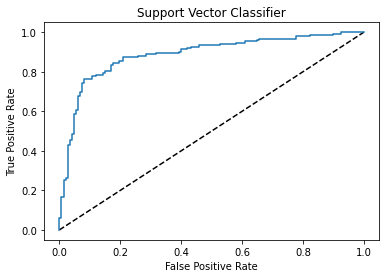

In [315]:
ply.plot([0,1],[0,1],"k--")
ply.plot(fpr,tpr,label="SupportVectorClassifier")
ply.xlabel("False Positive Rate")
ply.ylabel("True Positive Rate")
ply.title("Support Vector Classifier")
ply.show()

In [316]:
auc_score=roc_auc_score(y_test1,svc1.predict(x_test1))
auc_score

0.8205014224751067

The score is almost equal to accuracy score

# HyperParameter Tunning

In [317]:
parameter={"gamma":['scale','auto'],
          "shrinking":[True,False],
          "C":np.arange(2,20),
          "degree":np.arange(2,10)}

In [318]:
gcv=GridSearchCV(SVC(),parameter,cv=5)

In [319]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'degree': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [320]:
gcv.best_params_   #best parameters

{'C': 14, 'degree': 2, 'gamma': 'scale', 'shrinking': True}

# Final Model

In [326]:
final=SVC(kernel="poly",probability=True,C=14,gamma='scale',shrinking=True,degree=2)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.8233333333333334
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       148
           1       0.85      0.79      0.82       152

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



# Saving the model

In [327]:
import joblib
joblib.dump(final,"finalmod6.pkl")

['finalmod6.pkl']